# Task 1: Data Preparation

- **Download and Load Dataset:**
  - Download the provided Devnagari digits dataset folder.
  - Use the Python Imaging Library (PIL) to load and read the image files.

- **Preprocess Images:**
  - Convert images to NumPy arrays.
  - Resize images to a consistent shape (e.g., 28x28).
  - Normalize pixel values to the range 0–1.

- **Extract Labels:**
  - Extract the corresponding labels for each image from the folder names.
  - Convert labels to one-hot encoded format for multi-class classification.

*Hints:*
- Ensure images are resized to the same dimensions.
- Use the 'train' folder for training data and 'test' folder for testing data.

In [1]:
import zipfile

zip_file_path = './Copy of devnagari digit.zip'
extract_to_path = './devnagari_digit'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

2025-03-24 09:28:01.952888: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 09:28:02.161382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


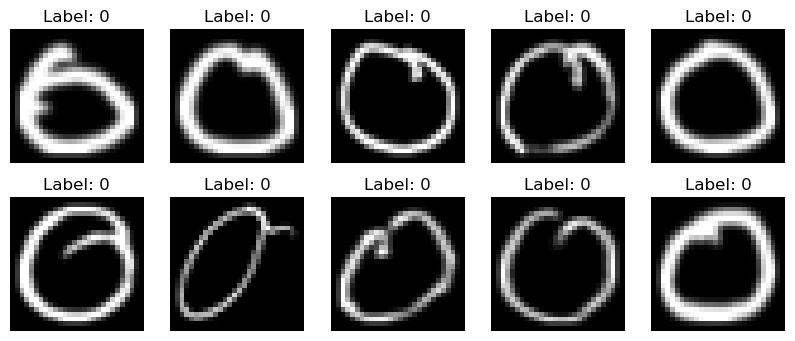

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "./devnagari_digit/DevanagariHandwrittenDigitDataset/Train"
test_dir = "./devnagari_digit/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

# Task 2: Build the FCN Model

- **Model Architecture:**
  - Create a Sequential model using Keras.

- **Add Hidden Layers:**
  - 1st hidden layer: 64 neurons with sigmoid activation.
  - 2nd hidden layer: 128 neurons with sigmoid activation.
  - 3rd hidden layer: 256 neurons with sigmoid activation.

- **Output Layer:**
  - Add an output layer with 10 units (for 10 classes) using softmax activation.

In [3]:
# Model parameters
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(),  # Flatten the 28x28 image to a 784-dimensional vector
        keras.layers.Dense(64, activation="sigmoid"),
        keras.layers.Dense(128, activation="sigmoid"),
        keras.layers.Dense(256, activation="sigmoid"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

- **Select an Optimizer:**
  - Example: Use Adam optimizer.

- **Choose a Loss Function:**
  - Example: Use sparse categorical crossentropy (if labels are not one-hot encoded) or categorical crossentropy (if one-hot encoded).

- **Define Evaluation Metrics:**
  - Example: Use accuracy.


In [4]:
model.compile(
    optimizer = "sgd", # Stochastic Gradient Descent
    loss = "categorical_crossentropy", # Loss function for multi-class classification
    metrics = ["accuracy"] # Track accuracy during training
)

# Task 4: Train the Model

- **Model Training:**
  - Use the `model.fit()` function.
  
- **Parameters:**
  - Batch size: 128
  - Number of epochs: 20
  - Validation split: 0.2

- **Optional:**
  - Use callbacks like `ModelCheckpoint` and `EarlyStopping` to save the best model and prevent overfitting.


In [5]:
import numpy as np
import keras
import os


# Create a custom model checkpoint callback
class CustomModelCheckpoint(keras.callbacks.Callback):
    def __init__(
        self,
        filepath,
        monitor="val_loss",
        verbose=0,
        save_best_only=False,
        save_weights_only=False,
        mode="auto",
    ):
        super().__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.verbose = verbose
        self.save_best_only = save_best_only
        self.save_weights_only = save_weights_only

        if mode == "min" or (mode == "auto" and "loss" in monitor):
            self.monitor_op = np.less
            self.best = np.inf  # Use lowercase inf
        else:
            self.monitor_op = np.greater
            self.best = -np.inf  # Use lowercase inf

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        filepath = self.filepath.format(epoch=epoch + 1, **logs)

        if self.save_best_only:
            current = logs.get(self.monitor)
            if current is None:
                return

            if self.monitor_op(current, self.best):
                if self.verbose > 0:
                    print(
                        f"\nEpoch {epoch + 1}: {self.monitor} improved from {self.best:.5f} to {current:.5f}, saving model to {filepath}"
                    )
                self.best = current
                if self.save_weights_only:
                    self.model.save_weights(filepath, overwrite=True)
                else:
                    self.model.save(filepath, overwrite=True)
            else:
                if self.verbose > 0:
                    print(
                        f"\nEpoch {epoch + 1}: {self.monitor} did not improve from {self.best:.5f}"
                    )
        else:
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: saving model to {filepath}")
            if self.save_weights_only:
                self.model.save_weights(filepath, overwrite=True)
            else:
                self.model.save(filepath, overwrite=True)

In [6]:
# Use the custom checkpoint
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
    CustomModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1262 - loss: 2.2451 - val_accuracy: 0.0000e+00 - val_loss: 4.6714
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1369 - loss: 2.0951 - val_accuracy: 0.0000e+00 - val_loss: 5.3060
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1369 - loss: 2.0869 - val_accuracy: 0.0000e+00 - val_loss: 5.6923
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1376 - loss: 2.0832 - val_accuracy: 0.0000e+00 - val_loss: 5.9723
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1342 - loss: 2.0821 - val_accuracy: 0.0000e+00 - val_loss: 6.1894


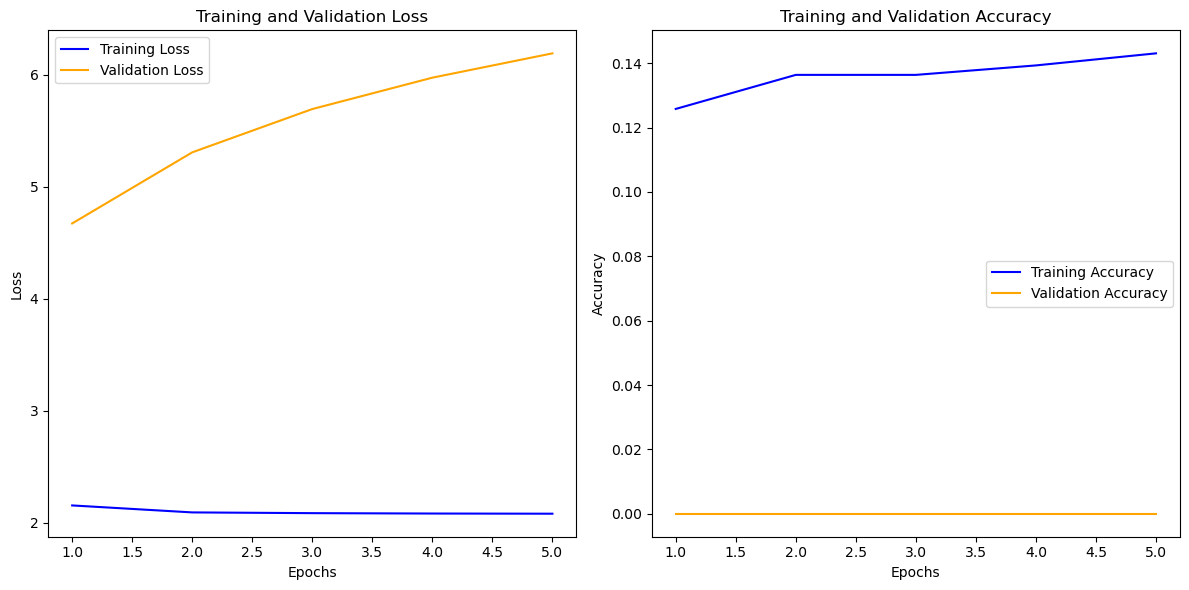

In [7]:
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Task 5: Evaluate the Model

- **Model Evaluation:**
  - Use the `model.evaluate()` function on the test set.
  - Assess the model's performance in terms of loss and accuracy.

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.1377 - loss: 2.9020
Test accuracy: 0.1377


# Task 6: Save and Load the Model

- **Saving the Model:**
  - Use `model.save('your_model_name.h5')` to save the trained model.

- **Loading the Model:**
  - Use `tf.keras.models.load_model('your_model_name.h5')` to load the saved model.
  - Re-evaluate its performance on the test set.

In [9]:
# Save the trained model
model.save('devnagari_digit_model.h5')

# Load the saved model
model = tf.keras.models.load_model('devnagari_digit_model.h5')

# Re-evaluate the loaded model on the test set
loaded_test_loss, loaded_test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded model test accuracy: {loaded_test_acc:.4f}")

94/94 - 1s - 7ms/step - accuracy: 0.1377 - loss: 2.9020
Loaded model test accuracy: 0.1377


# Task 7: Predictions

- **Making Predictions:**
  - Use the `model.predict()` function to predict on test images.
  
- **Post-Processing:**
  - Convert predicted probabilities to digit labels using `np.argmax()`.

- **Verification:**
  - Compare predicted labels with true labels for validation.


In [10]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted label for first image: 6
True label for first image: 0
